In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os
import time
from numba import njit
from scipy.optimize import curve_fit

from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [2]:
LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
stubs_awk_LS133 = OpenRootFile(LS133, stub_features)
stubs_awk_LS263 = OpenRootFile(LS263, stub_features)
stubs_awk_LS264 = OpenRootFile(LS264, stub_features)
stubs_awk_LS306 = OpenRootFile(LS306, stub_features)

gmt_awk_LS133 = OpenRootFile(LS133, gmt_features)
gmt_awk_LS263 = OpenRootFile(LS263, gmt_features)
gmt_awk_LS264 = OpenRootFile(LS264, gmt_features)
gmt_awk_LS306 = OpenRootFile(LS306, gmt_features)

bmtf_awk_LS133 = OpenRootFile(LS133, bmtf_features)
bmtf_awk_LS263 = OpenRootFile(LS263, bmtf_features)
bmtf_awk_LS264 = OpenRootFile(LS264, bmtf_features)
bmtf_awk_LS306 = OpenRootFile(LS306, bmtf_features)

# Molteplicità di Stub per GMT

In [3]:
#Caricamenot BX delle stubs
BX_LS133 = stubs_awk_LS133.bx
BX_LS263 = stubs_awk_LS263.bx
BX_LS264 = stubs_awk_LS264.bx
BX_LS306 = stubs_awk_LS306.bx

#Caricamento muoni di GMT
nGmtMuons_LS133 = gmt_awk_LS133.nGmtMuons
nGmtMuons_LS263 = gmt_awk_LS263.nGmtMuons
nGmtMuons_LS264 = gmt_awk_LS264.nGmtMuons
nGmtMuons_LS306 = gmt_awk_LS306.nGmtMuons

nBmtfMuons_LS133 = bmtf_awk_LS133.nBmtfMuons
nBmtfMuons_LS263 = bmtf_awk_LS263.nBmtfMuons
nBmtfMuons_LS264 = bmtf_awk_LS264.nBmtfMuons
nBmtfMuons_LS306 = bmtf_awk_LS306.nBmtfMuons

In [18]:
#GMT
bx_range = np.arange(ONE_ORBIT_IN_BX + 2)

bx_gmt_counts_LS133 = np.bincount(BX_LS133, weights=nGmtMuons_LS133)
bx_gmt_counts_LS263 = np.bincount(BX_LS263, weights=nGmtMuons_LS263)
bx_gmt_counts_LS264 = np.bincount(BX_LS264, weights=nGmtMuons_LS264)
bx_gmt_counts_LS306 = np.bincount(BX_LS306, weights=nGmtMuons_LS306)

bx_gmt_counts = (bx_gmt_counts_LS133 + bx_gmt_counts_LS263 + bx_gmt_counts_LS264 + bx_gmt_counts_LS306)/4


#BMTF
bx_bmtf_counts_LS133 = np.bincount(BX_LS133, weights=nBmtfMuons_LS133)
bx_bmtf_counts_LS263 = np.bincount(BX_LS263, weights=nBmtfMuons_LS263)
bx_bmtf_counts_LS264 = np.bincount(BX_LS264, weights=nBmtfMuons_LS264)
bx_bmtf_counts_LS306 = np.bincount(BX_LS306, weights=nBmtfMuons_LS306)

bx_bmtf_counts = (bx_bmtf_counts_LS133 + bx_bmtf_counts_LS263 + bx_bmtf_counts_LS264 + bx_bmtf_counts_LS306)/4



252.0


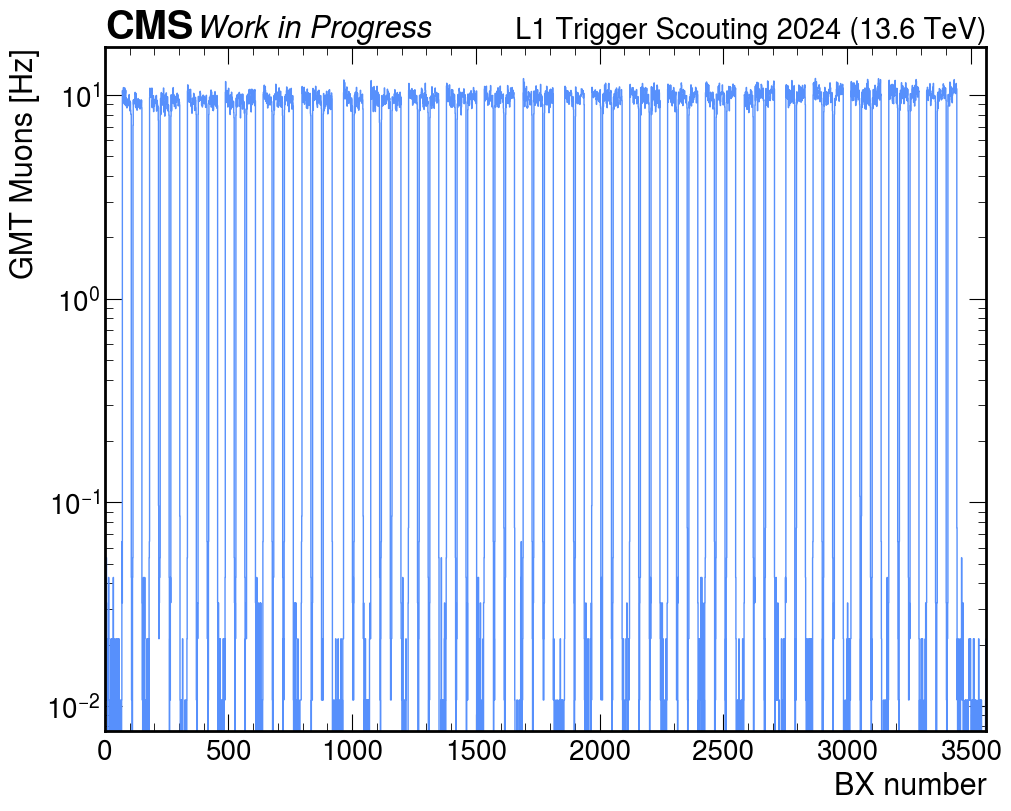

In [5]:
#Plot con i quattro file uniti
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_gmt_counts), histtype='step')
#ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_bmtf_counts), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('GMT Muons [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_yscale('log')

plt.savefig("../Immagini/GMT.pdf")
plt.savefig("../Immagini/ImmaginiPNG/GMT.png")

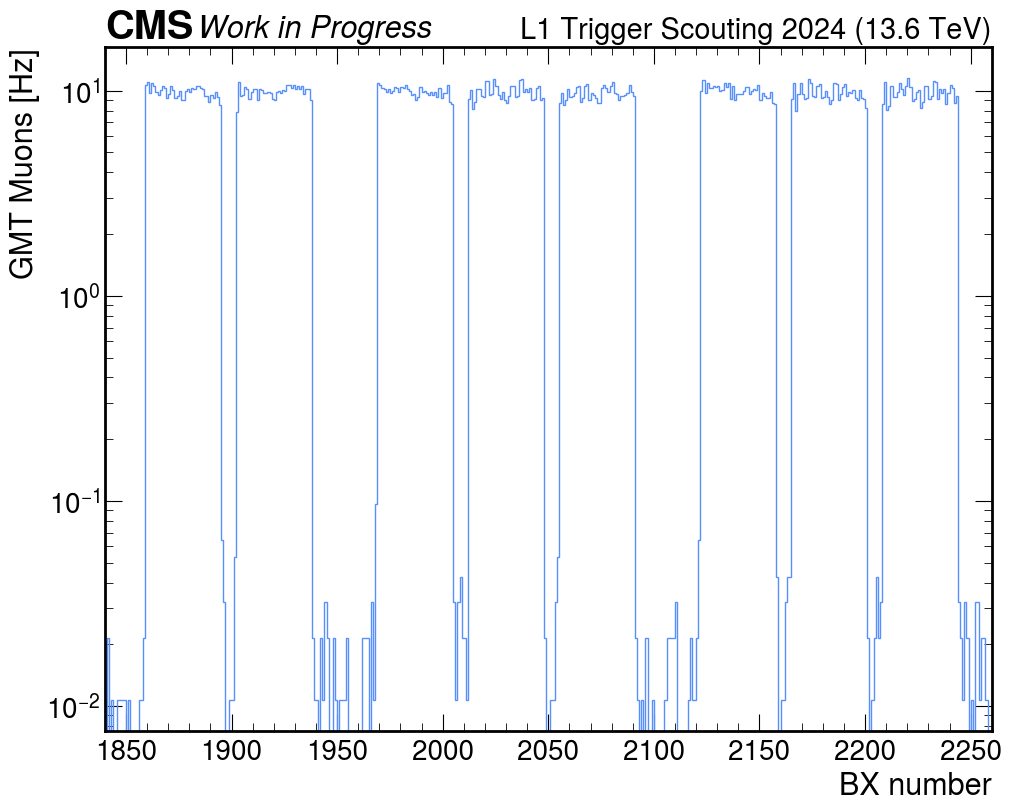

In [6]:
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

bx_left = 1840
bx_right = 2260

ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_gmt_counts[bx_left:bx_right]), histtype='step')
#ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_bmtf_counts[bx_left:bx_right]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('GMT Muons [Hz]')
ax.set_xlim(bx_left, bx_right)
ax.set_yscale('log')



In [7]:
nGmtLS133_count = ConvertToHz(np.bincount(nGmtMuons_LS133))
nGmtLS263_count = ConvertToHz(np.bincount(nGmtMuons_LS263))
nGmtLS264_count = ConvertToHz(np.bincount(nGmtMuons_LS264))
nGmtLS306_count = ConvertToHz(np.bincount(nGmtMuons_LS306))

nGmt_Array = ak.Array([nGmtLS133_count, nGmtLS263_count, nGmtLS264_count, nGmtLS306_count])

MaxStubs = max(len(nGmt_Array[0]), len(nGmt_Array[1]), len(nGmt_Array[2]), len(nGmt_Array[3]))

#Filled Array per eseguire una somma vettoriale dei 4 array
FnGmtLS133 = ak.fill_none(ak.pad_none(nGmt_Array[0], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS263 = ak.fill_none(ak.pad_none(nGmt_Array[1], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS264 = ak.fill_none(ak.pad_none(nGmt_Array[2], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS306 = ak.fill_none(ak.pad_none(nGmt_Array[3], MaxStubs, axis = 0, clip=True), 0)

nGmt = FnGmtLS133 + FnGmtLS263 + FnGmtLS264 + FnGmtLS306


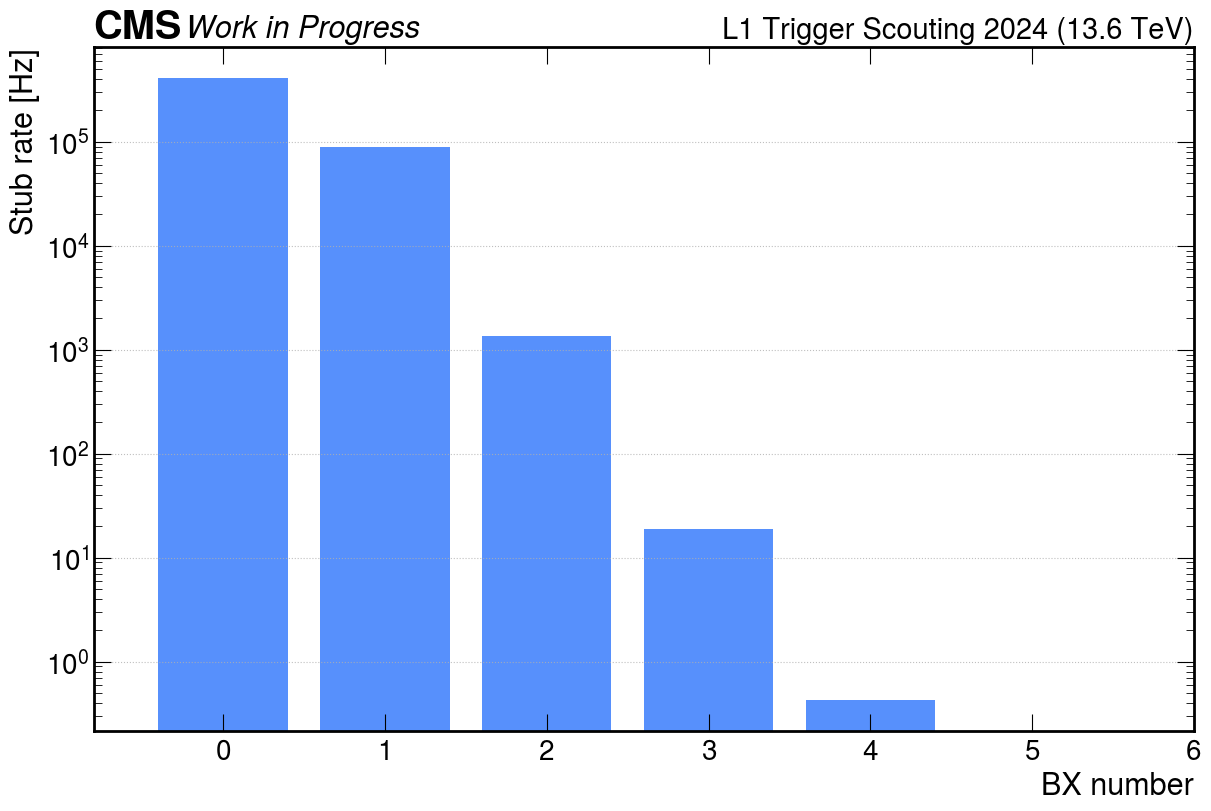

In [8]:
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(len(nGmt[:])), nGmt[:])

#ax.set_xticks(ticks=np.arange(9), labels=np.arange(1, 10, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(-0.8, 6)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

# $\Delta R$



## Phi ed Eta GMT

In [23]:
#-----------------------------------------------GMT-----------------------------------------------
GmtQualLS133 = ak.flatten(gmt_awk_LS133.gmtQual)
GmtQualLS263 = ak.flatten(gmt_awk_LS263.gmtQual)
GmtQualLS264 = ak.flatten(gmt_awk_LS264.gmtQual)
GmtQualLS306 = ak.flatten(gmt_awk_LS306.gmtQual)

GmtEtaLS133 = ak.flatten(gmt_awk_LS133.gmtEta)
GmtEtaLS263 = ak.flatten(gmt_awk_LS263.gmtEta)
GmtEtaLS264 = ak.flatten(gmt_awk_LS264.gmtEta)
GmtEtaLS306 = ak.flatten(gmt_awk_LS306.gmtEta)

GmtPhiLS133 = ak.flatten(gmt_awk_LS133.gmtPhi)
GmtPhiLS263 = ak.flatten(gmt_awk_LS263.gmtPhi)
GmtPhiLS264 = ak.flatten(gmt_awk_LS264.gmtPhi)
GmtPhiLS306 = ak.flatten(gmt_awk_LS306.gmtPhi)

GmtQual = ak.concatenate([GmtQualLS133, GmtQualLS263, GmtQualLS264, GmtQualLS306])
GmtPhi = ak.concatenate([GmtPhiLS133, GmtPhiLS263, GmtPhiLS264, GmtPhiLS306])
GmtEta = np.array(ak.concatenate([GmtEtaLS133, GmtEtaLS263, GmtEtaLS264, GmtEtaLS306]))

#-----------------------------------------------BMTF-----------------------------------------------

BmtfHwQualLS133 = ak.flatten(bmtf_awk_LS133.bmtfHwQual)
BmtfHwQualLS263 = ak.flatten(bmtf_awk_LS263.bmtfHwQual)
BmtfHwQualLS264 = ak.flatten(bmtf_awk_LS264.bmtfHwQual)
BmtfHwQualLS306 = ak.flatten(bmtf_awk_LS306.bmtfHwQual)

BmtfEtaLS133 = ak.flatten(bmtf_awk_LS133.bmtfEta)
BmtfEtaLS263 = ak.flatten(bmtf_awk_LS263.bmtfEta)
BmtfEtaLS264 = ak.flatten(bmtf_awk_LS264.bmtfEta)
BmtfEtaLS306 = ak.flatten(bmtf_awk_LS306.bmtfEta)

BmtfPhiLS133 = ak.flatten(bmtf_awk_LS133.bmtfPhi)
BmtfPhiLS263 = ak.flatten(bmtf_awk_LS263.bmtfPhi)
BmtfPhiLS264 = ak.flatten(bmtf_awk_LS264.bmtfPhi)
BmtfPhiLS306 = ak.flatten(bmtf_awk_LS306.bmtfPhi)

BmtfPhi = ak.concatenate([BmtfPhiLS133, BmtfPhiLS263, BmtfPhiLS264, BmtfPhiLS306])
BmtfEta = ak.concatenate([BmtfEtaLS133, BmtfEtaLS263, BmtfEtaLS264, BmtfEtaLS306])
BmtfWeights = np.array(ak.concatenate([BmtfHwQualLS133, BmtfHwQualLS263, BmtfHwQualLS264, BmtfHwQualLS306]))

In [ ]:
#Plot Eta 
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(GmtEta, bins = 100, alpha = 0.85, label=r'GMT $\eta$')
#ax.hist(BmtfEta, bins = 100, alpha = 0.85, label='BMTF $\eta$')

ax.set_xlabel(r'$\eta$')
ax.set_ylabel('Counts')
ax.legend()

ax.grid(visible=True, axis='y')
ax.set_yscale('log')

plt.show()

In [ ]:
#Grafico bidimensionale per i GMT

BinPhi = 15
BinEta = 15


PhiRange, PhiIndicies = Bins(ak.min(BmtfPhi), ak.max(BmtfPhi), BinPhi, BmtfPhi)
EtaRange, EtaIndicies = Bins(ak.min(BmtfEta), ak.max(BmtfEta), BinEta, BmtfEta)

hist2d = hist.Hist(
    hist.axis.Variable(np.round(EtaRange, 2), name='Eta', label='Eta number'),
    hist.axis.Variable(np.round(PhiRange, 2), name='Phi', label='Phi number'),
)
hist2d.fill(Phi=GmtPhi, Eta=GmtEta)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize=FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax)

cbar = ax.collections[0].colorbar
cbar.set_label('GMT counts', fontsize=FONTSIZE)

ax.set_xlabel(r'$\eta$ [rad]')
ax.set_ylabel(r'$\phi$')

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)

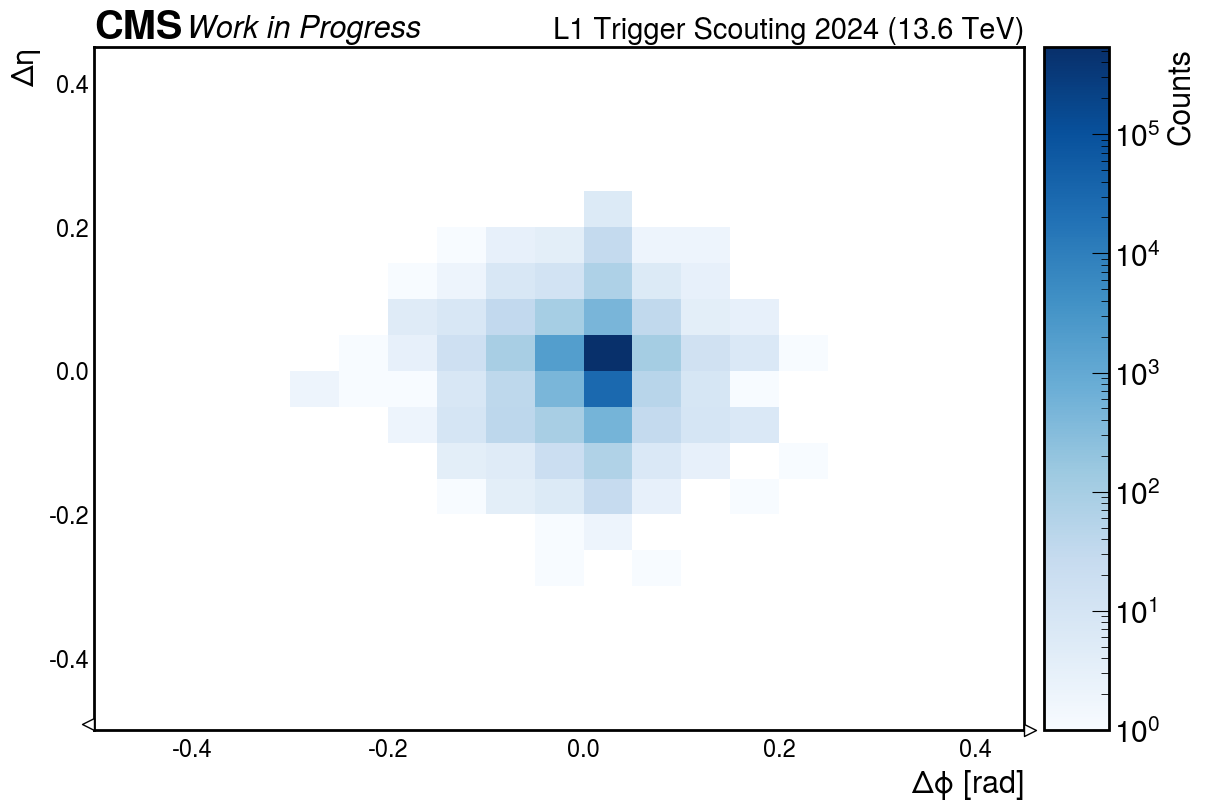

In [6]:
a = 0.5
DeltaPhiRange = np.arange(-a, a, 0.05)
DeltaEtaRange = np.arange(-a, a, 0.05)

hist2d = hist.Hist(
    hist.axis.Variable(DeltaPhiRange, name='Phi'),
    hist.axis.Variable(DeltaEtaRange, name='Eta')

)
hist2d.fill(Phi=DeltaPhi_BMTF_LS263, Eta=DeltaEta_BMTF_LS263)

from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize=FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax,  norm = LogNorm())

cbar = ax.collections[0].colorbar
cbar.set_label('Counts', fontsize=FONTSIZE)

ax.set_xlabel(r'$\Delta \phi$ [rad]')
ax.set_ylabel(r'$\Delta \eta$')
ax.grid(False)

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)


plt.savefig("../Immagini/BMTFPhiEta.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTFPhiEta.png")

plt.show()